Correlation Heatmap

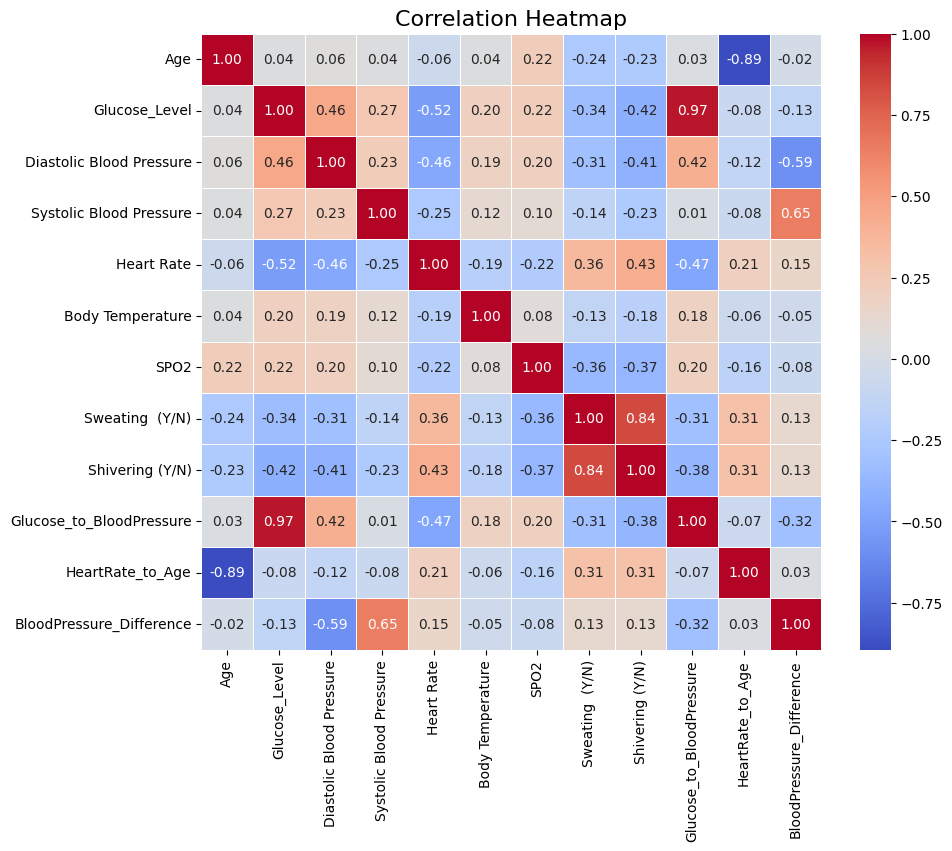

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Class Balance Check

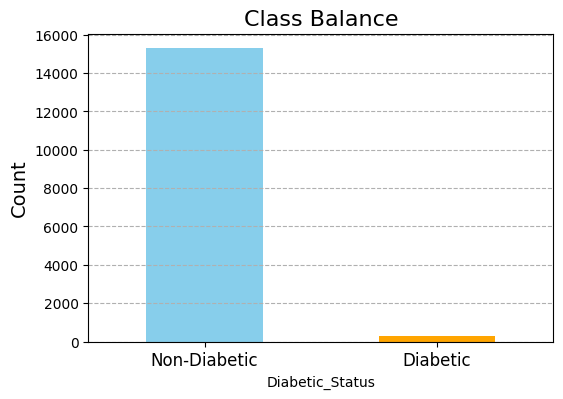

In [28]:
# Visualize class balance
plt.figure(figsize=(6, 4))
data['Diabetic_Status'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], rot=0)
plt.title('Class Balance', fontsize=16)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'], fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

Prepare Data for Machine Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = data.drop(['Diabetic_Status', 'Age_Group'], axis=1).select_dtypes(include='number')
y = data['Diabetic_Status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data prepared for Machine Learning!")

Data prepared for Machine Learning!


 Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
print("Logistic Regression trained successfully!")

Logistic Regression trained successfully!


Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest trained successfully!")

Random Forest trained successfully!


Model Evaluation

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Evaluate models
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")


Logistic Regression Evaluation:
Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           D       0.99      1.00      1.00      3057
           N       1.00      0.53      0.69        59

    accuracy                           0.99      3116
   macro avg       1.00      0.76      0.84      3116
weighted avg       0.99      0.99      0.99      3116

Confusion Matrix:
[[3057    0]
 [  28   31]]

Random Forest Evaluation:
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           D       1.00      1.00      1.00      3057
           N       1.00      0.88      0.94        59

    accuracy                           1.00      3116
   macro avg       1.00      0.94      0.97      3116
weighted avg       1.00      1.00      1.00      3116

Confusion Matrix:
[[3057    0]
 [   7   52]]


Hyperparameter Tuning for Random Forest

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")
best_rf_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.5s
[CV] END max_dep

Ensemble Learning with Voting Classifier

In [34]:
from sklearn.ensemble import VotingClassifier

# Combine models into a voting classifier
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('lr', lr_model)], voting='soft')
ensemble_model.fit(X_train, y_train)
print("Ensemble Model Trained!")

Ensemble Model Trained!
